# Exploratory Data Analysis and Visualizations

## Table of Content

#### 1. Data Import and Libraries

#### 2. Maximum Amount of Orders

#### 3. Busiest Weekday

#### 4. Busiest Time

#### 5. Most ordered Products

#### 6. Most Popular Product categories

## 1. Importing Data and Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
pd.options.display.max_columns = None

In [3]:
path = r'/Users/henning/Portfolio/Instacart_Basket'

In [4]:
instacart = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'instacart.pkl'))

## 2. Creating column with the number of orders a customer has placed

In [5]:
instacart['max_order'] = instacart.groupby(['customer'])['order_number'].transform(np.max)

/var/folders/5_/pv74frmn4fx0_vntxlc18yhm0000gn/T/ipykernel_32220/2116283170.py:1: FutureWarning: The provided callable <function max at 0x105932480> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  instacart['max_order'] = instacart.groupby(['customer'])['order_number'].transform(np.max)


In [6]:
instacart.sample(3)

,reordered,customer,eval_set,order_number,order_weekday,order_hour_of_day,days_since_prior_order,product_name,department,aisle,max_order
29436320,0,118506,prior,38,2,19,2.0,Tomato Paste,dry goods pasta,pasta sauce,50
26763070,1,164469,prior,43,4,14,1.0,Uncured Slow Cooked Ham,deli,lunch meat,100
33148152,1,63427,train,15,5,16,12.0,Caribbean Coconut Gelato,frozen,ice cream ice,15


In [7]:
# creating a subset to include only 1 row per customer.
df_customer = instacart.drop_duplicates(subset='customer')

In [8]:
df_customer.shape

(206209, 11)

/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='max_order', ylabel='Count'>

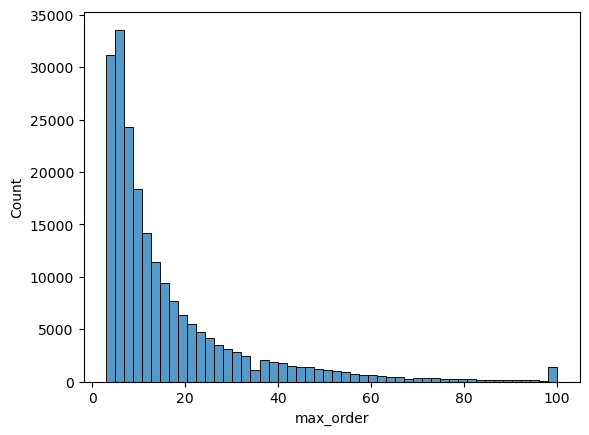

In [9]:
# creating a histogram

sns.histplot(df_customer['max_order'], bins = 50, kde = False)

The peak in the end can be explained by the fact, that every order over the 99th is cut off. This results in accumulating all customer that have any higher number of a max order over 99 to accumulate in the last bin.

## 3. what week day has the highest number of orders?

In [10]:
# creating a subset to include only 1 row per order.
df_order = instacart.drop_duplicates(subset=['customer', 'order_number'])

/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


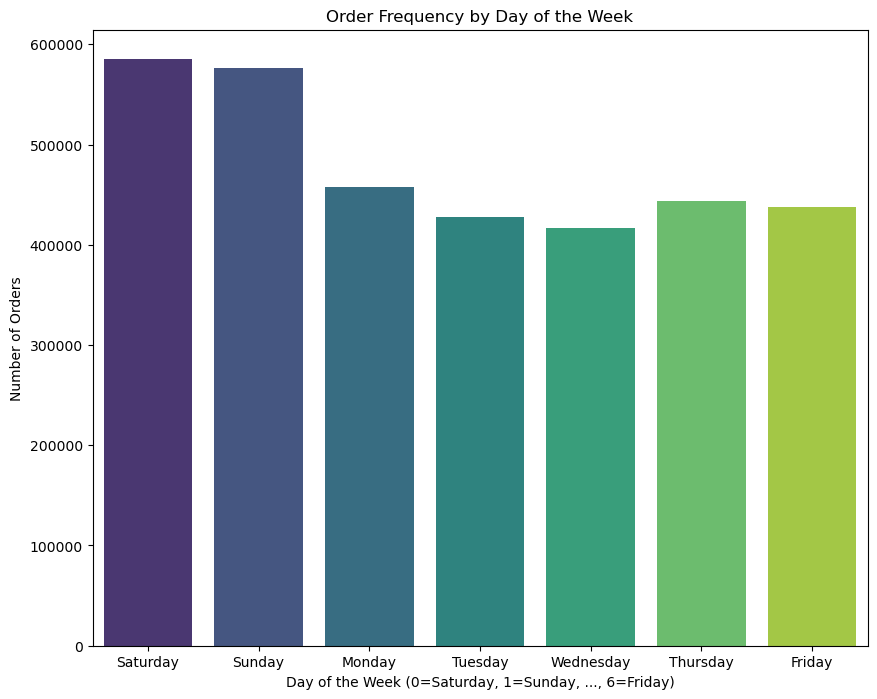

In [11]:
# On which weekdays are the order placed?
plt.figure(figsize=(10, 8))
sns.countplot(x='order_weekday', data=df_order, palette='viridis')
plt.title('Order Frequency by Day of the Week')
plt.xlabel('Day of the Week (0=Saturday, 1=Sunday, ..., 6=Friday)')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 7), ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])


# Save the figure to subfolder
plt.savefig(os.path.join(path, 'Visualizations', 'Frequency_by_weekday.jpg'), format='jpg', dpi=300)

# Show the plot
plt.show()

## 4. At what time are orders most likely placed?

/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


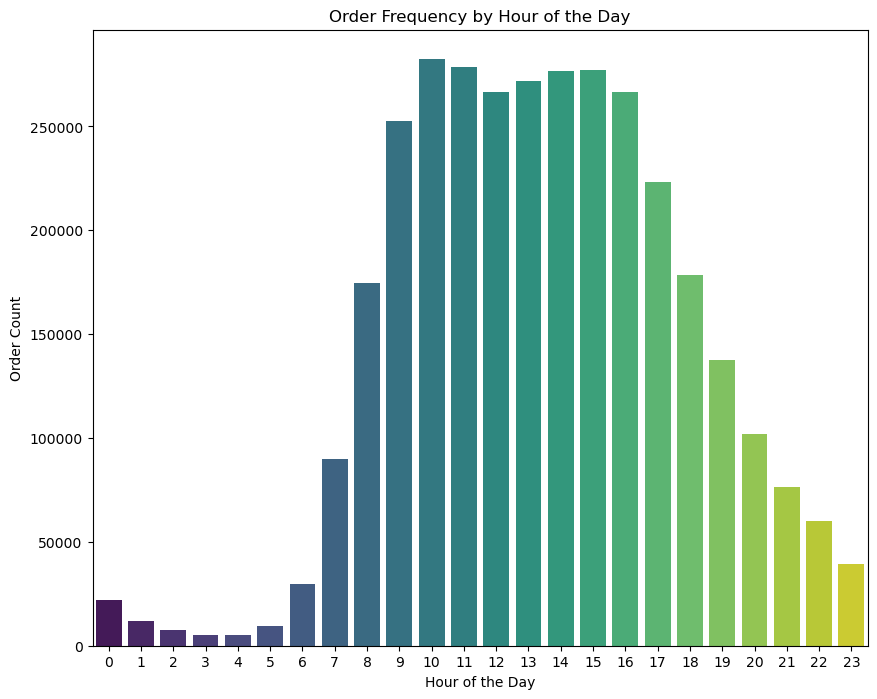

In [12]:
# in which hour of the day are the orders placed?
plt.figure(figsize=(10, 8))
sns.countplot(x='order_hour_of_day', data=df_order, palette="viridis")
plt.title('Order Frequency by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Order Count')

# Save the figure to subfolder
plt.savefig(os.path.join(path, 'Visualizations', 'Frequency_by_hour.jpg'), format='jpg', dpi=300)

# Show the plot
plt.show()

## 5. Top 10 Most Reordered Products

In [13]:
# Counting the number of reorders for each product
df_reorder = instacart[instacart['reordered'] == 1]['product_name'].value_counts().reset_index()
df_reorder.columns = ['product_name', 'reorder_count']

/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


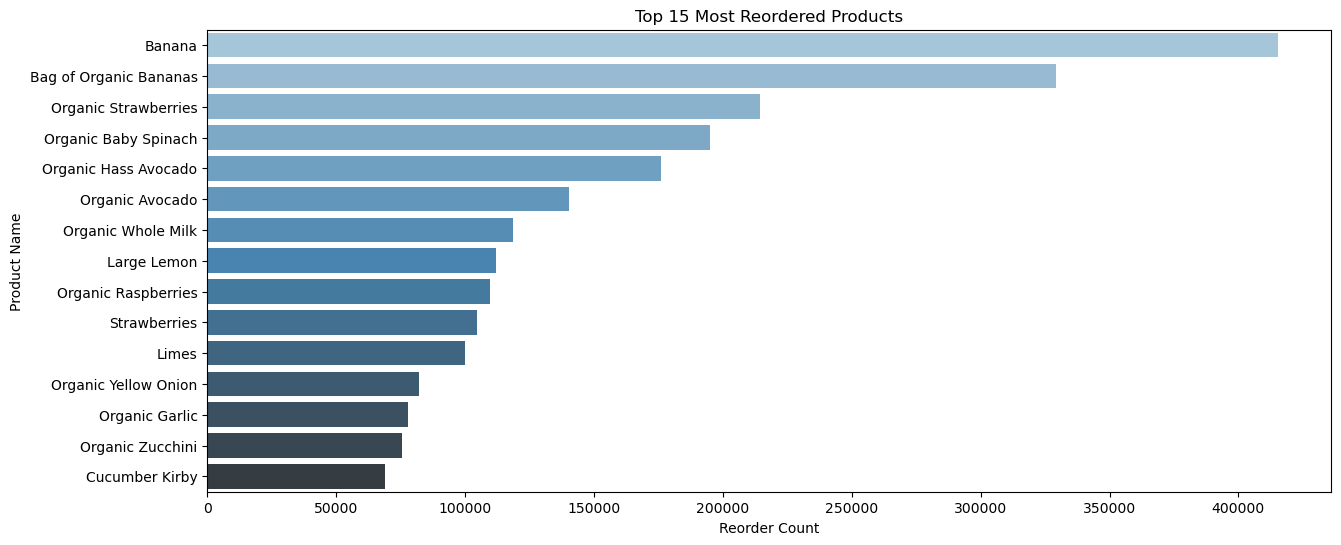

In [14]:
# Visualizing the top 15 most reordered products

plt.figure(figsize=(14.5, 6))
sns.barplot(x='reorder_count', y='product_name', data=df_reorder.head(15), palette="Blues_d")
plt.title('Top 15 Most Reordered Products')
plt.xlabel('Reorder Count')
plt.ylabel('Product Name')

# Save the figure to subfolder
plt.savefig(os.path.join(path, 'Visualizations', 'top_ten_products.jpg'), format='jpg', dpi=200)

# Show the plot
plt.show()

## 6. Product Analysis: Popularity of Departments and Aisles

In [15]:
# Counting the number of orders by department

df_department = instacart['department'].value_counts().reset_index()

df_department.columns = ['department', 'order_count']

/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


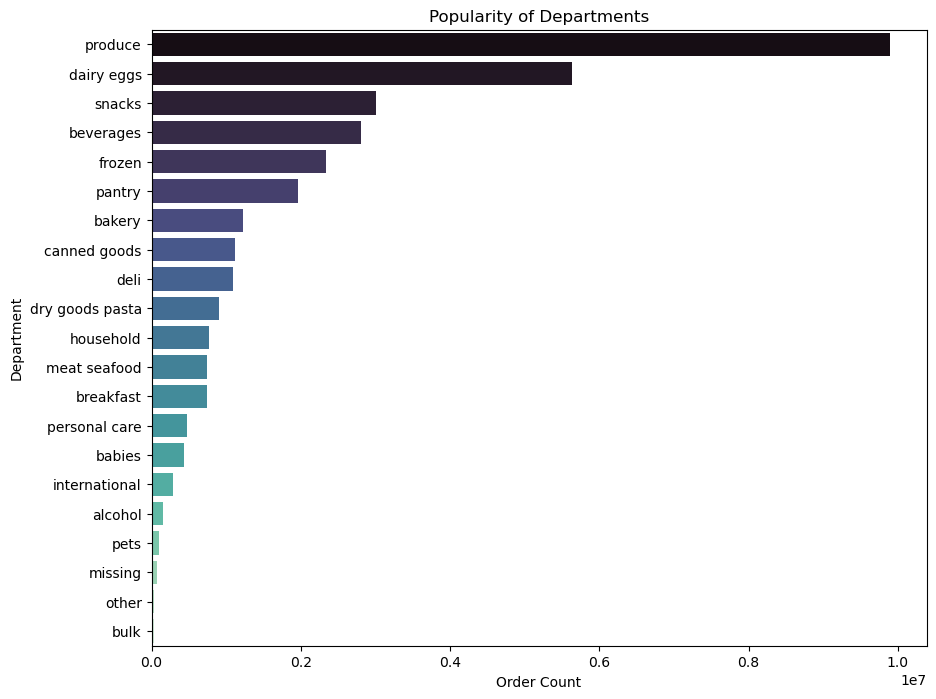

In [16]:
# Visualizing the popularity of departments

plt.figure(figsize=(10, 8))
sns.barplot(y='department', x='order_count', data=df_department, palette="mako")
plt.title('Popularity of Departments')
plt.xlabel('Order Count')
plt.ylabel('Department')

# Save the figure to subfolder
plt.savefig(os.path.join(path, 'Visualizations', 'most_popular_departement.jpg'), format='jpg', dpi=300)

# Show the plot
plt.show()

In [17]:
# Counting the number of orders by aisle

df_aisle = instacart['aisle'].value_counts().reset_index()

df_aisle.columns = ['aisle', 'order_count']

/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


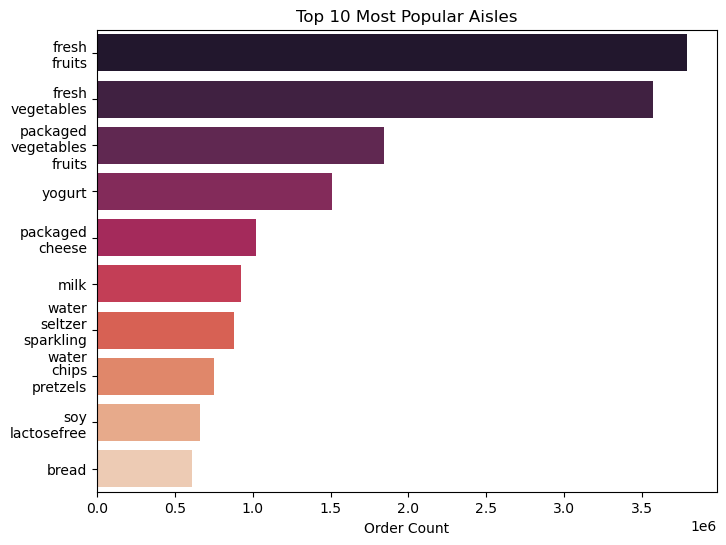

In [18]:
# split the aisles labels
df_aisle['aisle'] = df_aisle['aisle'].apply(lambda x: '\n'.join(x.split()))

# Visualizing the popularity of aisles

plt.figure(figsize=(8, 6))
sns.barplot(y='aisle', x='order_count', data=df_aisle.head(10), palette="rocket")
plt.title('Top 10 Most Popular Aisles')
plt.xlabel('Order Count')
plt.ylabel('')

# Save the figure to subfolder
plt.savefig(os.path.join(path, 'Visualizations', 'most_popular_aisle.jpg'), format='jpg', dpi=300)

# Show the plot
plt.show()

## 7. Distribution of time length between orders.

In [19]:
# looking up the longest time period between orders a customer has waited.
np.max(instacart['days_since_prior_order'])

30.0

/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/henning/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


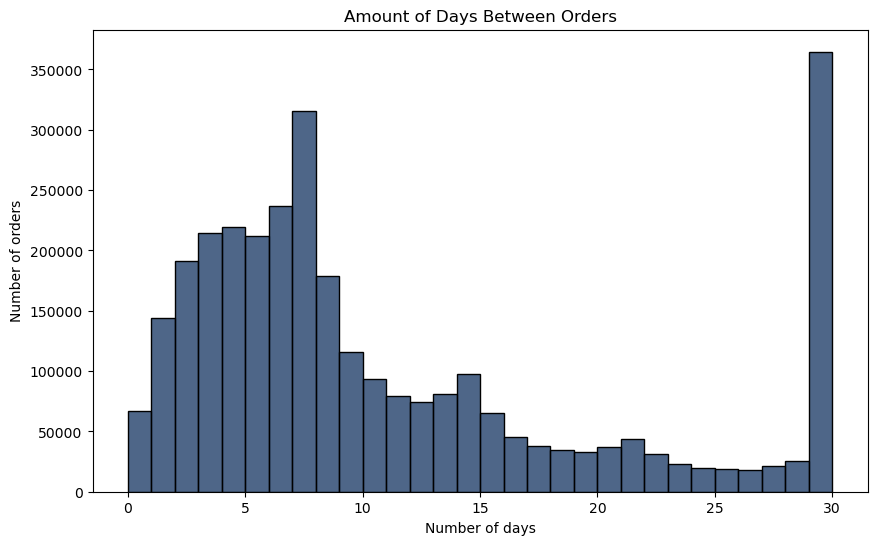

In [20]:
# bin size of 30

plt.figure(figsize=(10, 6))
sns.histplot(df_order['days_since_prior_order'], bins = 30, kde = False, color='#123360')
plt.title('Amount of Days Between Orders')
plt.xlabel('Number of days')
plt.ylabel('Number of orders')

# Save the figure to subfolder
plt.savefig(os.path.join(path, 'Visualizations', 'days_since_last_order.jpg'), format='jpg', dpi=300)

# Show the plot
plt.show()